In [1]:
import networkx
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ds_df = pd.read_csv('interactions_screenplay99.csv')

print(ds_df)

        Character      Listener  Interaction Count
0            BILL         ALICE                 73
1           ALICE          BILL                 72
2           ALICE           ROZ                  5
3             ROZ         ALICE                  4
4           ALICE        HELENA                  1
..            ...           ...                ...
117         SALLY          BILL                 22
118          BILL         SALLY                 19
119        DRIVER          BILL                  1
120          BILL  RECEPTIONIST                  6
121  RECEPTIONIST          BILL                  6

[122 rows x 3 columns]


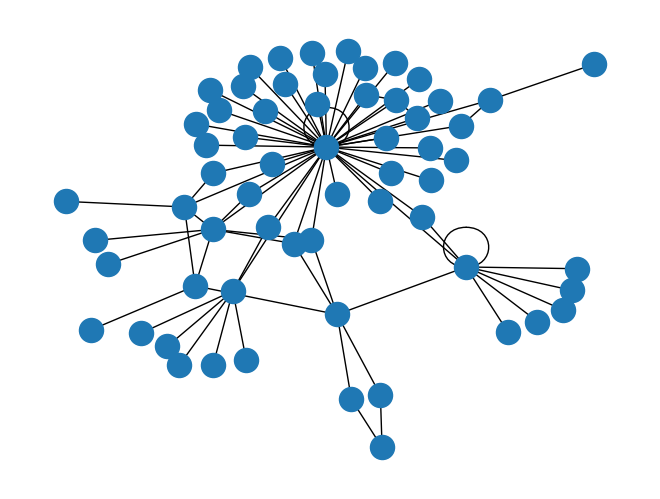

In [3]:
G = networkx.from_pandas_edgelist(ds_df, 'Character', 'Listener', 'Interaction Count')
networkx.write_graphml(G, 'DS-network.graphml')
networkx.draw(G)

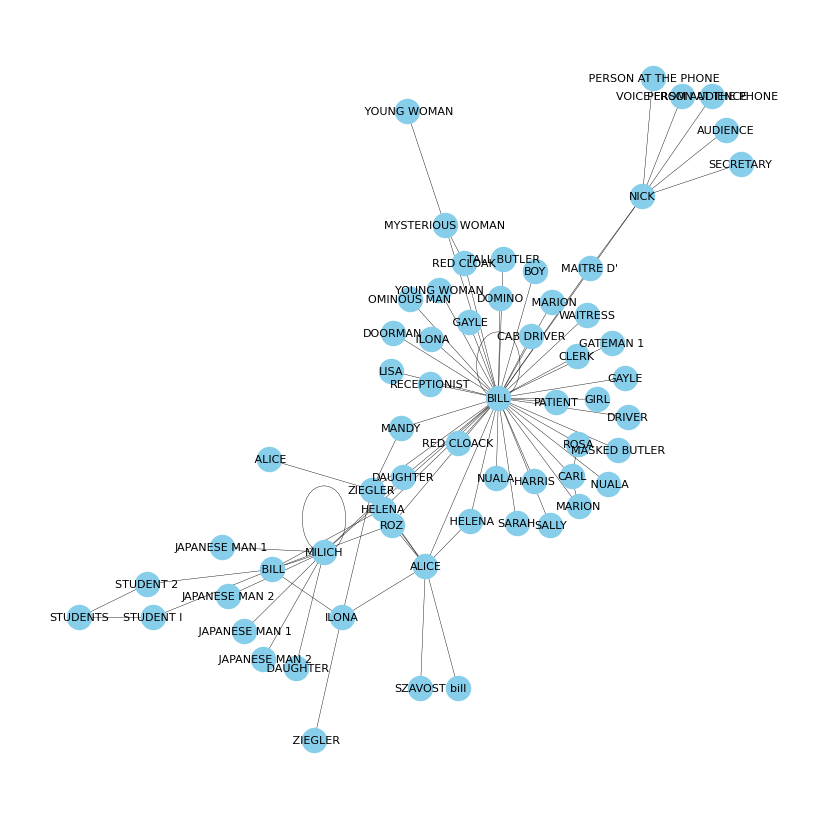

In [4]:
plt.figure(figsize=(8,8))
networkx.draw(G, with_labels=True, node_color='skyblue', width=.3, font_size=8)

Who has the most number of connections in the network?

In [5]:
networkx.degree(G)

DegreeView({'BILL': 43, 'ALICE': 8, 'ROZ': 3, ' HELENA': 2, 'HELENA': 3, ' BILL': 6, 'ZIEGLER': 5, ' ILONA': 1, ' ALICE': 1, 'ILONA': 4, ' ZIEGLER': 1, 'NICK': 7, 'SECRETARY': 1, 'SZAVOST': 1, 'GAYLE': 1, ' NUALA': 1, 'NUALA': 1, 'HARRIS': 1, ' GAYLE': 1, 'MANDY': 2, 'LISA': 1, 'SARAH': 1, 'GIRL': 1, 'BOY': 1, 'PATIENT': 1, 'ROSA': 2, 'MARION': 2, 'CARL': 3, ' MARION': 1, 'STUDENT I': 2, 'STUDENTS': 2, 'STUDENT 2': 2, 'DOMINO': 1, 'bill': 1, 'DOORMAN': 1, "MAITRE D'": 2, 'AUDIENCE': 1, 'VOICE FROM AUDIENCE': 1, ' PERSON AT THE PHONE': 1, 'PERSON AT THE PHONE': 1, 'DRIVER': 1, 'MILICH': 10, 'JAPANESE MAN 1': 1, 'DAUGHTER': 2, 'JAPANESE MAN 2': 1, ' JAPANESE MAN 1': 1, ' JAPANESE MAN 2': 1, ' DAUGHTER': 1, 'CAB DRIVER': 1, 'GATEMAN 1': 1, 'MASKED BUTLER': 1, 'MYSTERIOUS WOMAN': 3, 'OMINOUS MAN': 1, 'YOUNG WOMAN': 1, ' YOUNG WOMAN': 1, 'TALL BUTLER': 1, 'RED CLOAK': 2, 'RED CLOACK': 1, 'WAITRESS': 1, 'CLERK': 1, 'SALLY': 1, 'RECEPTIONIST': 1})

Make the degree values a dictionary, then add it as a network “attribute” with networkx.set_node_attributes()

In [6]:
degrees = dict(networkx.degree(G))
networkx.set_node_attributes(G, name='degree', values=degrees)

Make a Pandas dataframe from the degree data G.nodes(data='degree'), then sort from highest to lowest

In [7]:
degree_df = pd.DataFrame(G.nodes(data='degree'), columns=['node', 'degree'])
degree_df = degree_df.sort_values(by='degree', ascending=False)
degree_df

,node,degree
0,BILL,43
41,MILICH,10
1,ALICE,8
11,NICK,7
5,BILL,6
...,...,...
12,SECRETARY,1
36,AUDIENCE,1
37,VOICE FROM AUDIENCE,1
38,PERSON AT THE PHONE,1


Plot the nodes with the highest degree values

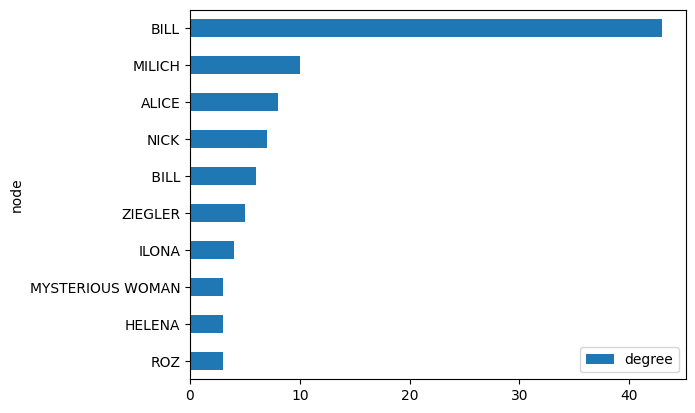

In [8]:
num_nodes_to_inspect = 10
degree_df[:num_nodes_to_inspect].plot(x='node', y='degree', kind='barh').invert_yaxis()